In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
!pip install plotly
import plotly.plotly as py
import plotly.graph_objs as go



    100% |████████████████████████████████| 30.1MB 257kB/s eta 0:00:01    61% |███████████████████▊            | 18.5MB 9.2MB/s eta 0:00:02
  Running setup.py bdist_wheel for plotly ... done
  Stored in directory: /Users/unit202301/Library/Caches/pip/wheels/a1/6f/1c/a3e69bfe6aebf1194c23f2fe8e7117966d4808fb788fcf01d0
  Running setup.py bdist_wheel for retrying ... done
  Stored in directory: /Users/unit202301/Library/Caches/pip/wheels/d7/a9/33/acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built plotly retrying


In [62]:
crime_data = pd.read_csv('dc-crimes-search-results.csv')
crime_data.head()


,NEIGHBORHOOD_CLUSTER,CENSUS_TRACT,offensegroup,LONGITUDE,END_DATE,offense-text,SHIFT,YBLOCK,DISTRICT,WARD,...,XBLOCK,BLOCK,START_DATE,CCN,OFFENSE,ANC,REPORT_DAT,METHOD,location,LATITUDE
0,cluster 15,600.0,property,-77.069766,2015-05-05T17:45:00.000,theft f/auto,evening,140519.000000,2.0,3.0,...,393951.000000,3500 - 3599 block of lowell street nw,2015-05-05T15:00:00.000,15064669,theft f/auto,3C,2015-05-05T22:06:00.000Z,others,"38.932540365033717,-77.069768169731375",38.932533
1,cluster 2,3000.0,violent,-77.031208,2015-05-05T20:55:00.000,robbery,evening,140084.000000,3.0,1.0,...,397294.000000,1300 - 1399 block of irving street nw,2015-05-05T20:50:00.000,15064781,robbery,1A,2015-05-06T01:05:00.000Z,gun,"38.928638407177509,-77.031210110921407",38.928631
2,cluster 3,4400.0,property,-77.028460,2015-05-05T22:14:00.000,motor vehicle theft,evening,139201.000000,3.0,1.0,...,397532.000000,1200 - 1247 block of florida avenue nw,2015-05-05T18:18:00.000,15064796,motor vehicle theft,1B,2015-05-06T02:58:00.000Z,others,"38.920684762113531,-77.028462123394547",38.920677
3,cluster 23,8804.0,violent,-76.985496,2015-06-23T08:00:00.000,homicide,midnight,137689.000000,5.0,5.0,...,401258.000000,1200 - 1299 block of holbrook terrace ne,2015-06-23T05:23:00.000,15094190,homicide,5D,2015-06-24T04:00:00.000Z,gun,"38.907066722563066,-76.985498377563218",38.907059
4,cluster 25,8100.0,property,-76.990245,2015-06-23T06:30:00.000,theft f/auto,day,136398.650012,1.0,6.0,...,400846.210015,duncan place ne and 12th street ne,2015-06-22T22:00:00.000,15094194,theft f/auto,6A,2015-06-23T12:48:00.000Z,others,"38.895443280295112,-76.990247632314322",38.895435


In [83]:
sorted_crime_data = crime_data.sort_values('NEIGHBORHOOD_CLUSTER')
sorted_crime_data.head()

,NEIGHBORHOOD_CLUSTER,CENSUS_TRACT,offensegroup,LONGITUDE,END_DATE,offense-text,SHIFT,YBLOCK,DISTRICT,WARD,...,XBLOCK,BLOCK,START_DATE,CCN,OFFENSE,ANC,REPORT_DAT,METHOD,location,LATITUDE
135153,cluster 1,3800.0,property,-77.038954,2015-01-28T17:00:00.000,theft f/auto,evening,139376.0,3.0,1.0,...,396622.0,2400 - 2499 block of 17th street nw,2015-01-28T14:00:00.000,15014035,theft f/auto,1C,2015-01-29T02:24:00.000Z,others,"38.922258191645199,-77.038956684128266",38.922250
90341,cluster 1,3800.0,property,-77.037697,2013-08-10T15:45:00.000,theft/other,evening,139353.0,3.0,1.0,...,396731.0,1600 - 1699 block of kalorama road nw,2013-08-10T15:30:00.000,13113053,theft/other,1C,2013-08-10T20:00:00.000Z,others,"38.922051412497567,-77.037699609217512",38.922044
68392,cluster 1,4002.0,property,-77.042953,2016-09-14T20:07:00.000,burglary,evening,138884.0,3.0,1.0,...,396275.0,1800 - 1899 block of california street nw,2016-09-14T08:30:54.000,16156091,burglary,1C,2016-09-15T02:44:08.000Z,others,"38.917824692522807,-77.042955546145862",38.917817
15711,cluster 1,3800.0,property,-77.040153,2011-04-18T19:00:00.000,theft f/auto,evening,139335.0,3.0,1.0,...,396518.0,2322 - 2499 block of ontario road nw,2011-04-18T17:00:00.000,11053088,theft f/auto,1C,2011-04-18T23:45:00.000Z,others,"38.921888444420887,-77.040155782537653",38.921881
273256,cluster 1,4002.0,property,-77.042367,2017-04-08T02:15:31.000,theft/other,midnight,139306.0,3.0,1.0,...,396326.0,2400 - 2499 block of 18th street nw,2017-04-08T00:25:26.000,17057074,theft/other,1C,2017-04-08T06:23:40.000Z,others,"38.921626421211776,-77.042369719927052",38.921619


In [65]:
robberies = crime_data.groupby('NEIGHBORHOOD_CLUSTER').OFFENSE.count()
robberies.head()

NEIGHBORHOOD_CLUSTER
cluster 1     7130
cluster 10    2327
cluster 11    4707
cluster 12    1648
cluster 13    1688
Name: OFFENSE, dtype: int64

In [6]:
air_bnb = pd.read_csv('listings.csv')
air_bnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,3362,"Convention Center Rowhouse & In Law: 2 Units, 4BR",2798,Ayeh,NaN,"Shaw, Logan Circle",38.910461,-77.019331,Entire home/apt,433,2,140,4/29/18,1.23,5,51
1,3662,Vita's Hideaway II,4645,Vita,NaN,Historic Anacostia,38.861925,-76.989634,Private room,75,2,34,9/24/17,0.39,3,275
2,3663,Classic Rowhouse: Porch+ART+Parking,4617,Shawn & Richard,NaN,"Brightwood Park, Crestwood, Petworth",38.958876,-77.025539,Entire home/apt,154,3,40,4/3/18,0.43,2,0
3,3670,Beautiful Sun-Lit U Street 1BR/1BA,4630,Sheila,NaN,"Howard University, Le Droit Park, Cardozo/Shaw",38.918417,-77.027500,Private room,75,2,71,5/6/18,1.84,1,340
4,3686,Vita's Hideaway,4645,Vita,NaN,Historic Anacostia,38.863138,-76.988362,Private room,65,2,67,10/29/17,0.73,3,276


In [9]:
air_bnb.drop('neighbourhood_group', axis=1, inplace=True)

In [10]:
air_bnb.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,3362,"Convention Center Rowhouse & In Law: 2 Units, 4BR",2798,Ayeh,"Shaw, Logan Circle",38.910461,-77.019331,Entire home/apt,433,2,140,4/29/18,1.23,5,51
1,3662,Vita's Hideaway II,4645,Vita,Historic Anacostia,38.861925,-76.989634,Private room,75,2,34,9/24/17,0.39,3,275
2,3663,Classic Rowhouse: Porch+ART+Parking,4617,Shawn & Richard,"Brightwood Park, Crestwood, Petworth",38.958876,-77.025539,Entire home/apt,154,3,40,4/3/18,0.43,2,0
3,3670,Beautiful Sun-Lit U Street 1BR/1BA,4630,Sheila,"Howard University, Le Droit Park, Cardozo/Shaw",38.918417,-77.027500,Private room,75,2,71,5/6/18,1.84,1,340
4,3686,Vita's Hideaway,4645,Vita,Historic Anacostia,38.863138,-76.988362,Private room,65,2,67,10/29/17,0.73,3,276


In [110]:
air_bnb.sort_values(['neighbourhood', 'price'])
new_air_bnb = air_bnb.dropna(how='any')
new_air_bnb.head()


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,3362,"Convention Center Rowhouse & In Law: 2 Units, 4BR",2798,Ayeh,"Shaw, Logan Circle",38.910461,-77.019331,Entire home/apt,433,2,140,4/29/18,1.23,5,51
1,3662,Vita's Hideaway II,4645,Vita,Historic Anacostia,38.861925,-76.989634,Private room,75,2,34,9/24/17,0.39,3,275
2,3663,Classic Rowhouse: Porch+ART+Parking,4617,Shawn & Richard,"Brightwood Park, Crestwood, Petworth",38.958876,-77.025539,Entire home/apt,154,3,40,4/3/18,0.43,2,0
3,3670,Beautiful Sun-Lit U Street 1BR/1BA,4630,Sheila,"Howard University, Le Droit Park, Cardozo/Shaw",38.918417,-77.027500,Private room,75,2,71,5/6/18,1.84,1,340
4,3686,Vita's Hideaway,4645,Vita,Historic Anacostia,38.863138,-76.988362,Private room,65,2,67,10/29/17,0.73,3,276


In [111]:
avg_price = new_air_bnb.groupby('neighbourhood').price.mean()
num_reviews = new_air_bnb.groupby('neighbourhood').number_of_reviews.count()

In [113]:
brightwood = new_air_bnb[new_air_bnb.neighbourhood == 'Brightwood Park, Crestwood, Petworth']
bookland = new_air_bnb[new_air_bnb.neighbourhood == 'Brookland, Brentwood, Langdon']
capitol_hill = new_air_bnb[new_air_bnb.neighbourhood == 'Capitol Hill, Lincoln Park']
capitol_view = new_air_bnb[new_air_bnb.neighbourhood == 'Capitol View, Marshall Heights, Benning Heights']
cathedral = new_air_bnb[new_air_bnb.neighbourhood == 'Cathedral Heights, McLean Gardens, Glover Park']
cleveland_park = new_air_bnb[new_air_bnb.neighbourhood == 'Cleveland Park, Woodley Park, Massachusetts Avenue Heights, Woodland-Normanstone Terrace']
colonial_village = new_air_bnb[new_air_bnb.neighbourhood == 'Colonial Village, Shepherd Park, North Portal Estates']
columbia_heights = new_air_bnb[new_air_bnb.neighbourhood == 'Columbia Heights, Mt. Pleasant, Pleasant Plains, Park View']
congress_heights = new_air_bnb[new_air_bnb.neighbourhood == 'Congress Heights, Bellevue, Washington Highlands']
deanwood = new_air_bnb[new_air_bnb.neighbourhood == 'Deanwood, Burrville, Grant Park, Lincoln Heights, Fairmont Heights']
douglas = new_air_bnb[new_air_bnb.neighbourhood == 'Douglas, Shipley Terrace']
downtown = new_air_bnb[new_air_bnb.neighbourhood == 'Downtown, Chinatown, Penn Quarters, Mount Vernon Square, North Capitol Street']
dupont = new_air_bnb[new_air_bnb.neighbourhood == 'Dupont Circle, Connecticut Avenue/K Street']
eastland = new_air_bnb[new_air_bnb.neighbourhood == 'Eastland Gardens, Kenilworth']
edgewood = new_air_bnb[new_air_bnb.neighbourhood == 'Edgewood, Bloomingdale, Truxton Circle, Eckington ']
fairfax = new_air_bnb[new_air_bnb.neighbourhood == 'Fairfax Village, Naylor Gardens, Hillcrest, Summit Park']
friendship_heights = new_air_bnb[new_air_bnb.neighbourhood == 'Friendship Heights, American University Park, Tenleytown']
georgetown = new_air_bnb[new_air_bnb.neighbourhood == 'Georgetown, Burleith/Hillandale']
hawthorne = new_air_bnb[new_air_bnb.neighbourhood == 'Hawthorne, Barnaby Woods, Chevy Chase']
historic_anacostia = new_air_bnb[new_air_bnb.neighbourhood == 'Historic Anacostia']
howard = new_air_bnb[new_air_bnb.neighbourhood == 'Howard University, Le Droit Park, Cardozo/Shaw']
ivy_city = new_air_bnb[new_air_bnb.neighbourhood == 'Ivy City, Arboretum, Trinidad, Carver Langston']
kalorama = new_air_bnb[new_air_bnb.neighbourhood == 'Kalorama Heights, Adams Morgan, Lanier Heights']
lamont_riggs = new_air_bnb[new_air_bnb.neighbourhood == 'Lamont Riggs, Queens Chapel, Fort Totten, Pleasant Hill']
mayfair = new_air_bnb[new_air_bnb.neighbourhood == 'Mayfair, Hillbrook, Mahaning Heights']
near_southeast = new_air_bnb[new_air_bnb.neighbourhood == 'Near Southeast, Navy Yard ']
north_cleveland_park = new_air_bnb[new_air_bnb.neighbourhood == 'North Cleveland Park, Forest Hills, Van Ness']
north_michigan_park = new_air_bnb[new_air_bnb.neighbourhood == 'North Michigan Park, Michigan Park, University Heights']
river_terrace = new_air_bnb[new_air_bnb.neighbourhood == 'River Terrace, Benning, Greenway, Dupont Park']
shaw = new_air_bnb[new_air_bnb.neighbourhood == 'Shaw, Logan Circle']
sheridan = new_air_bnb[new_air_bnb.neighbourhood == 'Sheridan, Barry Farm, Buena Vista']
southwest_employment_area = new_air_bnb[new_air_bnb.neighbourhood == 'Southwest Employment Area, Southwest/Waterfront, Fort McNair, Buzzard Point']
spring_valley = new_air_bnb[new_air_bnb.neighbourhood == 'Spring Valley, Palisades, Wesley Heights, Foxhall Crescent, Foxhall Village, Georgetown Reservoir']
takoma = new_air_bnb[new_air_bnb.neighbourhood == 'Takoma, Brightwood, Manor Park ']
twining = new_air_bnb[new_air_bnb.neighbourhood == 'Twining, Fairlawn, Randle Highlands, Penn Branch, Fort Davis Park, Fort Dupont']
union_station = new_air_bnb[new_air_bnb.neighbourhood == 'Union Station, Stanton Park, Kingman Park']
west_end = new_air_bnb[new_air_bnb.neighbourhood == 'West End, Foggy Bottom, GWU ']
woodland = new_air_bnb[new_air_bnb.neighbourhood == 'Woodland/Fort Stanton, Garfield Heights, Knox Hill']
woodridge = new_air_bnb[new_air_bnb.neighbourhood == 'Woodridge, Fort Lincoln, Gateway']


/Users/unit202301/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning:


Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike



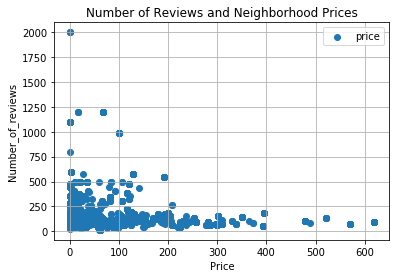

In [106]:
# Set the x limit,
#plt.xlim(400, -1)


#plot scatterplot using a for loop.
dataframe = air_bnb.loc[air_bnb["price"]]
plt.scatter(dataframe["number_of_reviews"],dataframe["price"])
    
#Add legend
plt.legend(bbox_to_anchor = (1,1))

#Add title, x axis label, and y axis label.
plt.title("Number of Reviews and Neighborhood Prices")
plt.xlabel("Price")
plt.ylabel("Number_of_reviews")

#Set a grid on the plot.
plt.grid()

#plt.savefig("Sentiment Analysis of Media Tweets")
plt.show()

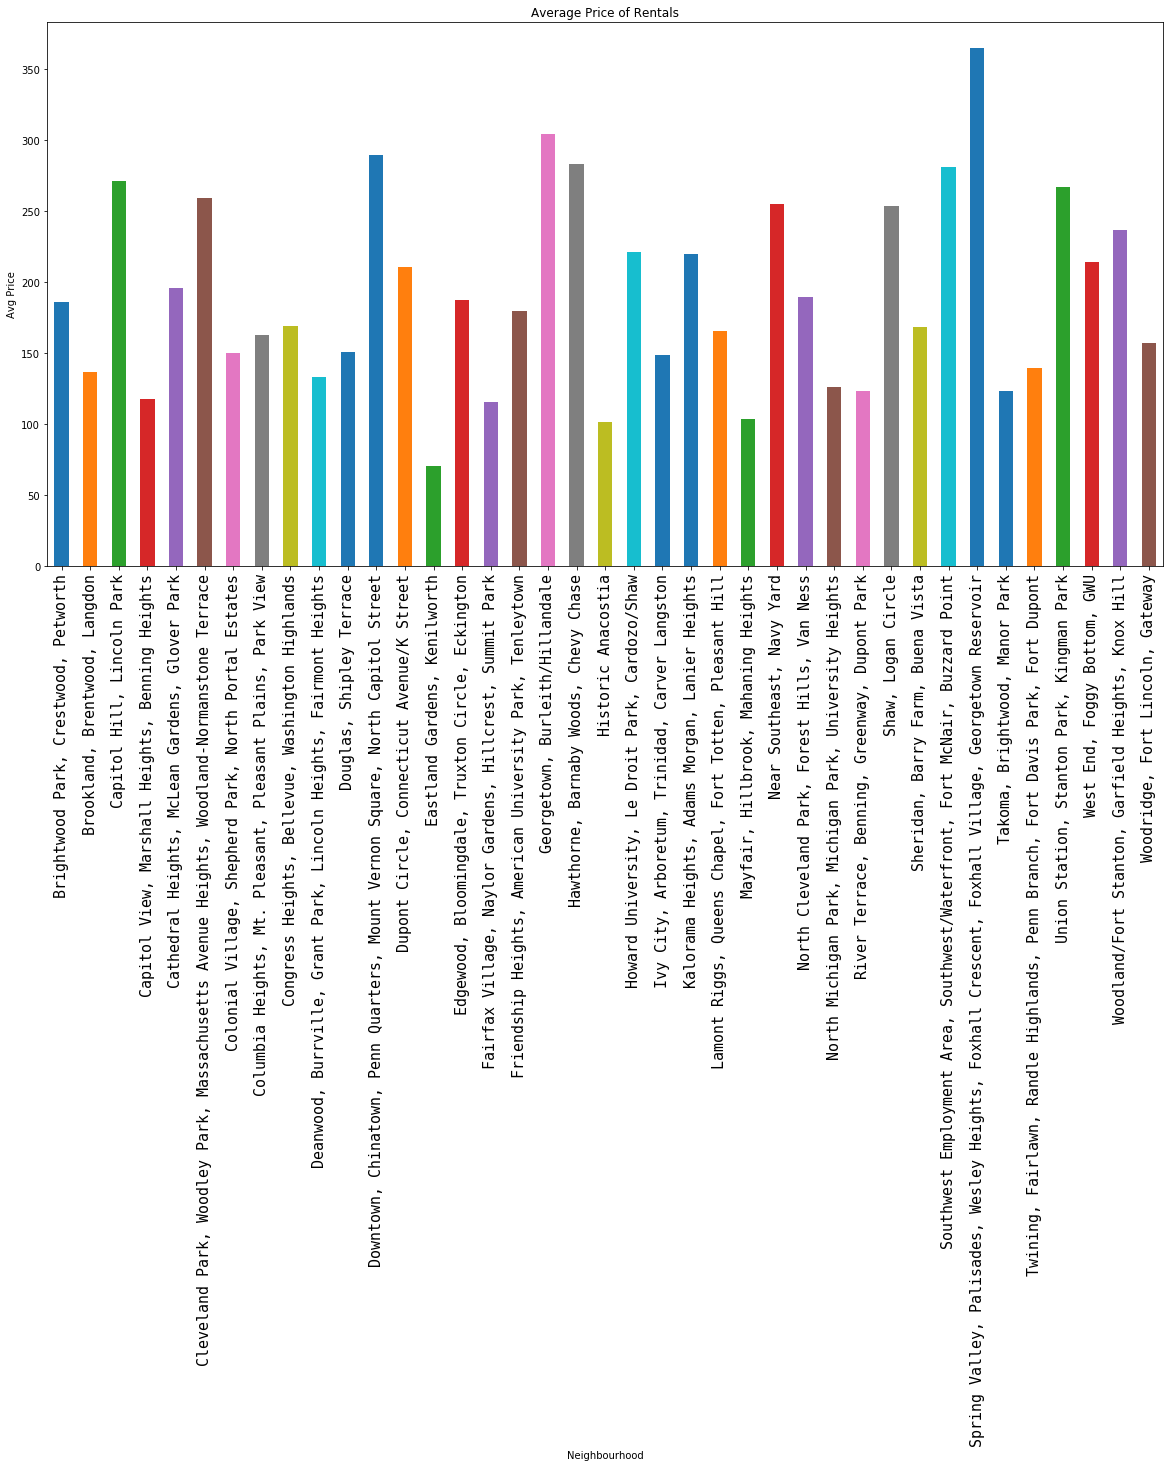

In [72]:
width = 0.50
plt.xticks(rotation=55, fontsize=15, fontname='monospace')

plt.rcParams['figure.figsize'] = (20,10)
price_chart = avg_price.plot(kind="bar", title="Average Price of Rentals")
price_chart.set_xlabel("Neighbourhood")
price_chart.set_ylabel("Avg Price")
price_chart.plot(figsize=(100,50))
plt.savefig('Average_Rental_Prices')
plt.show()
#plt.tight_layout()